In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
epochs = 200
IMG_HEIGHT = 30
IMG_WIDTH = 30
TRAIN_PATH = 'shapes'
VAL_PATH = 'val_shapes'

In [3]:
train_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='int',
    directory=TRAIN_PATH,
    color_mode="grayscale",
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 860 files belonging to 3 classes.


In [4]:
val_data =  tf.keras.utils.image_dataset_from_directory(
    batch_size=batch_size,
    label_mode='int',
    directory=VAL_PATH,
    shuffle=True,
    color_mode="grayscale",
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 252 files belonging to 3 classes.


In [5]:
class_names = train_data.class_names
print(class_names)

['0', '1', '2']


2024-07-21 14:17:30.158231: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


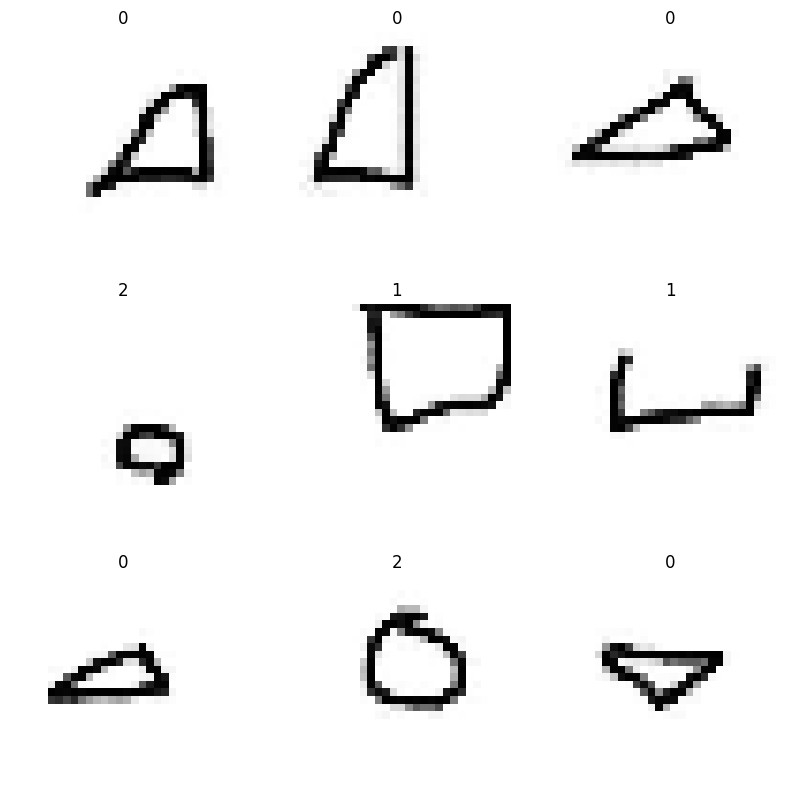

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #print(images[i].numpy().max())
    plt.imshow(images[i].numpy(),cmap='gray' )
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
#Build the model
from tensorflow.keras import layers
model = Sequential([
    layers.Input(shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax"),
])
# Compile the model
model.compile(optimizer='adam',              
              loss="sparse_categorical_crossentropy",              
              metrics=['accuracy'])
# print the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         6,915 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,731 (100.51 KB)

 Trainable params: 25,731 (100.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3668 - loss: 15.4854 - val_accuracy: 0.4524 - val_loss: 1.1452
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4281 - loss: 1.1808 - val_accuracy: 0.4722 - val_loss: 1.0867
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4243 - loss: 1.0713 - val_accuracy: 0.3929 - val_loss: 1.0854
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4502 - loss: 1.0794 - val_accuracy: 0.4722 - val_loss: 1.0205
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4447 - loss: 1.0801 - val_accuracy: 0.5357 - val_loss: 1.0374
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4333 - loss: 1.0502 - val_accuracy: 0.4484 - val_loss: 1.0658
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4445 - loss: 1.0548 - val_accuracy: 0.4643 - val_loss: 1.0474
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4616 - loss: 1.0288 - val_accuracy: 0.4802 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1. 0. 0.]]


2024-07-21 14:18:25.870573: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


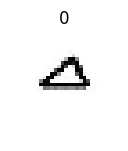

In [10]:
for images, labels in train_data.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        #print(images[i].numpy().max())
        plt.imshow(images[i].numpy(),cmap='gray' )
        plt.title(class_names[labels[i]])
        plt.axis("off")
        print(np.round(model.predict(images[:1])))



In [11]:
#img_path = 'shapes/1/1681791001.jpg'
#img_path = 'shapes/2/1681770064.jpg'
img_path = 'shapes/0/1681770059.jpg'
newimg = tf.keras.utils.load_img(
    path=img_path,
    color_mode='grayscale',
    target_size=(30,30),
    interpolation='nearest',
    keep_aspect_ratio=False
)
newimg


In [12]:
input_arr = tf.keras.utils.img_to_array(newimg)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(np.round(model.predict(input_arr)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[1. 0. 0.]]


In [13]:
model.save('app/shapes_v1.keras')

In [14]:
from tensorflow import keras
model = keras.models.load_model('app/shapes_v1.keras')

In [15]:
input_arr = tf.keras.utils.img_to_array(newimg)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(np.round(model.predict(input_arr)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1. 0. 0.]]
